# Monetary Economics: Chapter 7

### Preliminaries

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve.model import Model
from pysolve.utils import is_close,round_solution

import matplotlib.pyplot as plt

### Model BMW

In [2]:
def create_bmw_model():
    model = Model()

    model.set_var_default(0)
    model.var('AF', desc='Amortization funds')
    model.var('Cd', desc='Consumption goods demand by households')
    model.var('Cs', desc='Consumption goods supply')
    model.var('DA', desc='Depreciation allowance')
    model.var('K', desc='Stock of capital')
    model.var('Kt', desc='Target stock of capital')
    model.var('Ld', desc='Demand for bank loans')
    model.var('Ls', desc='Supply of bank loans')
    model.var('Id', desc='Demand for investment goods')
    model.var('Is', desc='Supply of investment goods')
    model.var('Mh', desc='Bank deposits held by households')
    model.var('Ms', desc='Supply of bank deposits')
    model.var('Nd', desc='Demand for labor')
    model.var('Ns', desc='Supply of labor')
    model.var('Rl', desc='Rate of interest on bank loans')
    model.var('Rm', desc='Rate of interest on bank deposits')
    model.var('W', desc='Wage rate')
    model.var('WBd', desc='Wage bill - demand')
    model.var('WBs', desc='Wage bill - supply')
    model.var('Y', desc='Income = GDP')
    model.var('YD', desc='Disposable income of households')
    
    model.set_param_default(0)
    model.param('alpha0', desc='Exogenous component in consumption')
    model.param('alpha1', desc='Propensity to consume out of income')
    model.param('alpha2', desc='Propensity to consume out of wealth')
    model.param('delta', desc='Depreciation rate')
    model.param('gamma', desc='Speed of adjustment of capital to its target value')
    model.param('kappa', desc='Capital-output ratio')

    model.param('PR', desc='Labor productivity')
    model.param('Rlbar', desc='Rate of interest on bank loans, set exogenously')

    # Basic behavioural equations
    model.add('Cs = Cd')
    model.add('Is  = Id')
    model.add('Ns = Nd')
    model.add('Ls - Ls(-1) = Ld - Ld(-1)')
    model.add('Y = Cs + Is')
    model.add('WBd = Y - Rl(-1)*Ld(-1) - AF')
    model.add('AF = delta * K(-1)')
    model.add('Ld - Ld(-1) = Id - AF')
    
    # Transactions of households
    model.add('YD = WBs + Rm(-1)*Mh(-1)')
    model.add('Mh - Mh(-1) = YD - Cd')
    
    # Transactions of the banks
    model.add('Ms - Ms(-1) = Ls - Ls(-1)')
    model.add('Rm = Rl')
    
    # The wage bill
    model.add('WBs = W * Ns')
    model.add('Nd = Y / PR')
    model.add('W = WBd / Nd')
    
    # Household behavior
    model.add('Cd = alpha0 + alpha1*YD + alpha2*Mh(-1)')
    
    # The investment beahavior
    model.add('K - K(-1) = Id - DA')
    model.add('DA = delta * K(-1)')
    model.add('Kt = kappa * Y(-1)')
    model.add('Id = gamma * (Kt - K(-1)) + DA')
    
    # The behaviour of banks
    model.add('Rl = Rlbar')    

    return model

bmw_parameters = {'alpha0': 25,
                  'alpha1': 0.75,
                  'alpha2': 0.1,
                  'delta': 0.1,
                  'gamma': 0.15,
                  'kappa': 1}
bmw_exogenous = {'PR': 1,
                 'Rlbar': 0.04}
bmw_variables = {'Mh': 200,
                 'Ms': 200,
                 'Ld': 200,
                 'Ls': 200,
                 'K': 200,
                 'Y': 200,
                 'Rl': 0.04,
                 'Rm' : 0.04,
                 'W': 0.86,
                 'Cd': 200}

### Scenario: Model BMW, increase in autonomous consumption

In [3]:
alpha0 = create_bmw_model()
alpha0.set_values(bmw_parameters)
alpha0.set_values(bmw_exogenous)
alpha0.set_values(bmw_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(15):
    alpha0.solve(iterations=200, threshold=1e-5)

# shock the system
alpha0.set_values({'alpha0': 28})

for _ in range(40):
    alpha0.solve(iterations=100, threshold=1e-5)

###### Figure 7.1

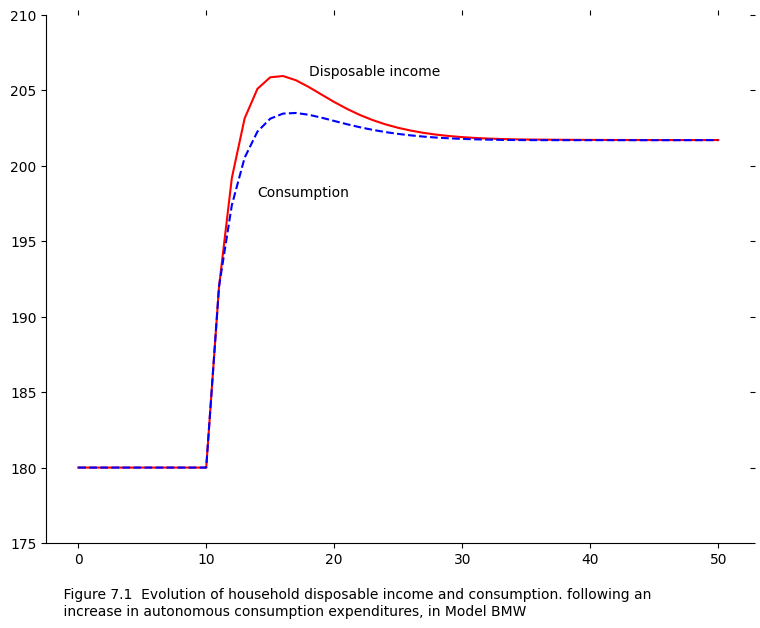

In [4]:
caption = '''
    Figure 7.1  Evolution of household disposable income and consumption. following an
    increase in autonomous consumption expenditures, in Model BMW'''
yddata = [s['YD'] for s in alpha0.solutions[5:]]
cddata = [s['Cd'] for s in alpha0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(175, 210)

axes.plot(yddata, linestyle='-', color='r')
axes.plot(cddata, linestyle='--', color='b')

# add labels
plt.text(18, 206, 'Disposable income')
plt.text(14, 198, 'Consumption')
fig.text(0.1, -.05, caption);

###### Figure 7.2

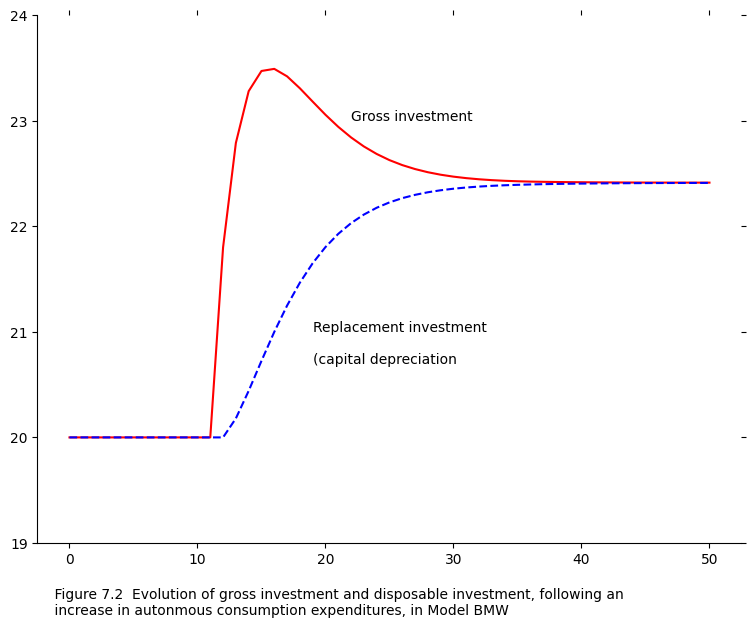

In [5]:
caption = '''
    Figure 7.2  Evolution of gross investment and disposable investment, following an
    increase in autonmous consumption expenditures, in Model BMW'''
iddata = [s['Id'] for s in alpha0.solutions[5:]]
dadata = [s['DA'] for s in alpha0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(19, 24)

axes.plot(iddata, linestyle='-', color='r')
axes.plot(dadata, linestyle='--', color='b')

# add labels
plt.text(22, 23, 'Gross investment')
plt.text(19, 21, 'Replacement investment')
plt.text(19, 20.7, '(capital depreciation')
fig.text(0.1, -.05, caption);

###### Scenario: Model BMW, increase in propensity to save out of disposable income

In [6]:
alpha1 = create_bmw_model()
alpha1.set_values(bmw_parameters)
alpha1.set_values(bmw_exogenous)
alpha1.set_values(bmw_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(15):
    alpha1.solve(iterations=200, threshold=1e-6)

# shock the system
alpha1.set_values({'alpha1': 0.74})

for _ in range(40):
    alpha1.solve(iterations=100, threshold=1e-6)

###### Figure 7.3

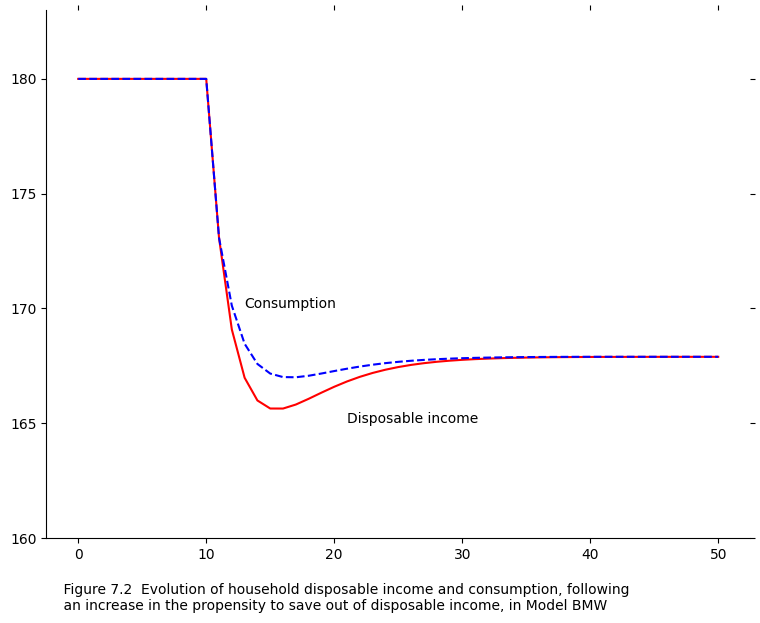

In [7]:
caption = '''
    Figure 7.2  Evolution of household disposable income and consumption, following
    an increase in the propensity to save out of disposable income, in Model BMW'''
yddata = [s['YD'] for s in alpha1.solutions[5:]]
cddata = [s['Cd'] for s in alpha1.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(160, 183)

axes.plot(yddata, linestyle='-', color='r')
axes.plot(cddata, linestyle='--', color='b')

# add labels
plt.text(13, 170, 'Consumption')
plt.text(21, 165, 'Disposable income')
fig.text(0.1, -.05, caption);

###### Figure 7.4

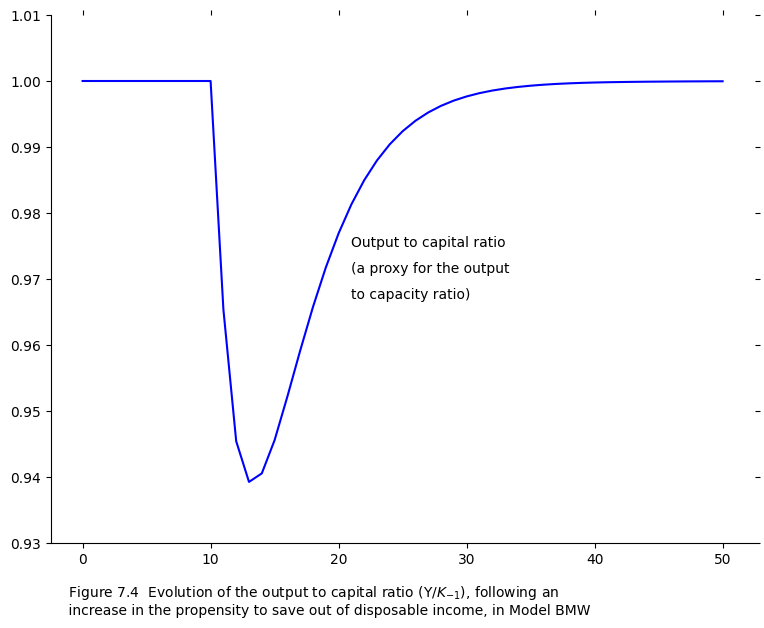

In [8]:
caption = '''
    Figure 7.4  Evolution of the output to capital ratio (Y/$K_{-1}$), following an
    increase in the propensity to save out of disposable income, in Model BMW'''
data = list()
for i in range(5, len(alpha1.solutions)):
    s = alpha1.solutions[i]
    s_1 = alpha1.solutions[i-1]
    data.append(s['Y'] / s_1['K'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.93, 1.01)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(21, 0.975, 'Output to capital ratio')
plt.text(21, 0.971, '(a proxy for the output')
plt.text(21, 0.967, 'to capacity ratio)')
         
fig.text(0.1, -.05, caption);

###### Figure 7.5

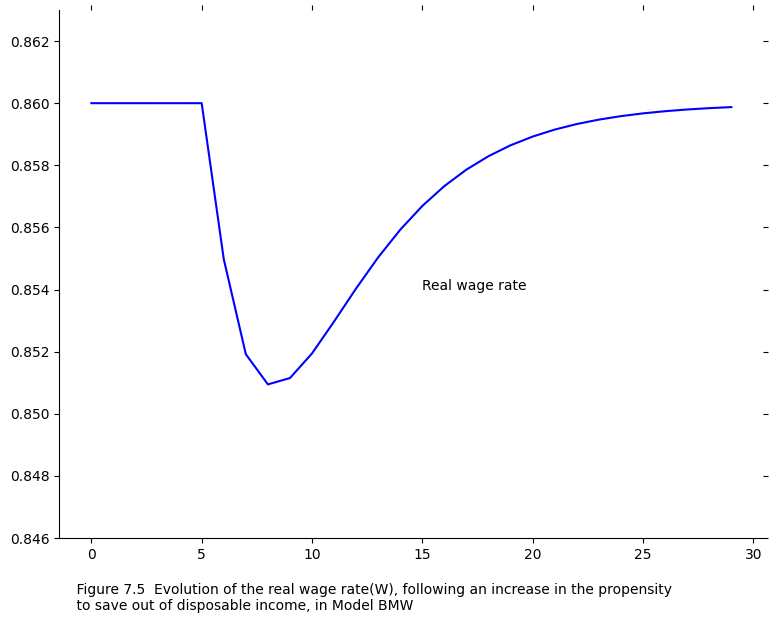

In [9]:
caption = '''
    Figure 7.5  Evolution of the real wage rate(W), following an increase in the propensity
    to save out of disposable income, in Model BMW'''
data = [s['W'] for s in alpha1.solutions[10:40]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.846, 0.863)

axes.plot(data, linestyle='-', color='b')
# add labels
plt.text(15, 0.854, 'Real wage rate')
         
fig.text(0.1, -.05, caption);